# <center>  Multi Layer Perceptron (MLP) on MNIST.

* This assignment is a playaround with Mnist dataset to understand the working of MLP with different parameter settings. 

* We will create 3 different architectures as mentioned below and see how good the model performance is,
  * 2 layers.
  * 3 layers.
  * 5 layers.
  
*  We knew that Relu works very well but we will also apply sigmoid and also we try with SGD instead of adam.

* We will perform hyper parameter tuning on all the 3 architectures using Gridsearch CV from sklearn and tune parameter like activation unit used & dropout rate.

 



In [0]:
import seaborn as sns
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from keras.utils import np_utils 
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal
from keras.initializers import glorot_normal
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def plotter(x, v, t):
    plt.figure(figsize=(9,5))
    plt.plot(x, v, 'b', label="Validation Loss")
    plt.plot(x, t, 'r', label="Train Loss")
    plt.xlabel('Epochs',fontsize=13)
    plt.ylabel('Train & Valdation loss',fontsize=13)
    plt.title('Epoch vs Train & Validation loss ',fontsize=15)
    plt.legend()
    plt.show()

In [0]:
def weight_analyzer(model):
  '''
  To analyse the weight vectors using box plot
  '''
  
  w = model.get_weights()

  l1_w = w[0].flatten().reshape(-1,1)
  l2_w = w[2].flatten().reshape(-1,1)
  out_w = w[4].flatten().reshape(-1,1)
  

  fig = plt.figure(figsize=(10,5))
  
  plt.subplot(1, 3, 1)
  sns.violinplot(y=l1_w,color='b')
  plt.xlabel('Hidden Layer 1',fontsize=12)
  
  plt.subplot(1, 3, 2)
  sns.violinplot(y=l2_w, color='r')
  plt.xlabel('Hidden Layer 2 ',fontsize=12)
  
  plt.subplot(1, 3, 3)
  sns.violinplot(y=out_w,color='y')
  plt.xlabel('Output Layer ',fontsize=12)
  
  plt.suptitle("Distribution of weight matrices after model trained",fontsize=15)
  plt.show()

In [0]:
def Confusion_matrix(x,y):
  '''
  To print confusion matrix as heatmap
  '''
  Conf_Matrix=confusion_matrix(np.argmax(x,axis=1),y)
  plt.figure(figsize=(15,4))
  sns.heatmap(Conf_Matrix,annot=Conf_Matrix,fmt='',cmap='Blues') 
  plt.title("Confusion matrix ",fontsize=15)

In [0]:
# Loading dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Since the shape of each image is 28 x 28, we will covert them into a (1x784) vector so that single  row in dataset can completely represent a datapoint

In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

### One hot encoding of Class labels:

In [0]:
print("Class label of first image :", y_train[0])

Class label of first image : 5


In Keras, since we have the output of a datapoint represented directly just like a categorical value. We use one hot encoding to convert the output label into a 10d vector representation which will be needed to work with MLPs.

In [0]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("One hot encoding representation of class[1] : ",Y_train[0])

One hot encoding representation of class[1] :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Since the class label of 1st datapoint is 5, we got value as 1 in the index corresponding to '5', and all other values are set to zero.

In [0]:
pd.value_counts(y_train)

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

We have class labels in almost equal propotions, hence we can use accuracy as our metric.

### Creating CV set:

In [0]:
from sklearn.model_selection import train_test_split
x_tr,x_cv,y_tr,y_cv=train_test_split(X_train,Y_train,test_size=0.15)

In [0]:
print(f'No of samples in Train set : {x_tr.shape[0]}')
print(f'No of samples in Validation set : {x_cv.shape[0]}')

No of samples in Train set : 51000
No of samples in Validation set : 9000


While fitting with a MLP model, we use the x_tr and x_cv thus generated here. But while hyperparameter tuning using Gridsearch CV, we will use X_train, as it will do k_fold CV internally.

### Normalizing data:

Normalizing the data is a most important step for deep learning models to work properly.

In [0]:
X_train=X_train/255
x_tr = x_tr/255
x_cv=x_cv/255
X_test = X_test/255

In [0]:
# example data point after normlizing
print(x_tr[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## <center>  MLP - Arichtecture 1(2 Layers) :

The first MLP configuration that we use is ,

<b> <center>            Input layer -> Hidden layer 1(400 Neurons) -> Hidden layer 2(200 Neurons) -> Output layer(Softmax)

In [0]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 150  #Batch size
epoch = 20  # No of epochs
layer1= 400 # No of neurons in layer 1
layer2= 200 # No of neurons in layer 2

In [0]:
def model_MLP(opt,activ,BN,drop):
  '''
  To create a MLP model with mentioned parameters optimization ,activation ,Batch Normalization, dropout.
  '''
  mnist_model = Sequential()
  
  #To set initializer for weights according to activation
  # Since default is glorot and Sigmoid works well.For Relu we need to modify with he_normal intialization
  if activ=='relu':
    k=he_normal(seed=33)
  else:
    k=glorot_normal(seed=33)
  
  # Layer 1
  mnist_model.add(Dense(layer1, input_dim=input_dim, activation=activ,kernel_initializer=k))  
  if BN==1:
    mnist_model.add(BatchNormalization())
  if drop!=0:
    mnist_model.add(Dropout(drop))
  
    
  # Layer 2
  
  mnist_model.add(Dense(layer2, activation=activ,kernel_initializer=k))
  if BN==1:
    mnist_model.add(BatchNormalization())
  if drop!=0:
    mnist_model.add(Dropout(drop))
     
  
  # Output layer
  mnist_model.add(Dense(output_dim, activation='softmax'))
  
  mnist_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
  
  mnist_model.summary()
  return mnist_model
  

In [0]:
def model_performance(Opt,activ,BN=0,drop=0):
  '''
  Training an MLP created by the function 'model'.
  '''
  model=model_MLP(Opt,activ,BN,drop)
  start=datetime.now()
  model_trained = model.fit(x_tr, y_tr, batch_size=batch_size, epochs=epoch, verbose=0, validation_data=(x_cv,y_cv))
  pred=model.predict_classes(X_test)
  print('\n###################################################################\n')
  print(f'\nTime taken for training is {datetime.now()-start}')
  score = model.evaluate(X_test, Y_test, verbose=0) 
  print('\nTest score:', score[0]) 
  print('\nTest accuracy:', score[1])
  score1 = model.evaluate(x_tr, y_tr, verbose=0) 
  print('\n\nTrain score:', score1[0]) 
  print('\nTrain accuracy:', score1[1])
  print('\n###################################################################\n')
  
  
  x = list(range(1,epoch+1)) 
  validation_loss=model_trained.history['val_loss']
  train_loss=model_trained.history['loss']

  plotter(x, validation_loss, train_loss)
  
  print('\n###################################################################\n')
  weight_analyzer(model)
  print('\n###################################################################\n')
  Confusion_matrix(Y_test,pred)
  
  


#### Hyperparameter tuning:

Though we have handfull of hyperparameters to be tuned for MLPs, due to limitation of computational resource, we consider only the activation function and dropout rate and tune them to find the most appropriate value.

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
activ = ['sigmoid','relu']
drop=[0.3,0.5,0.7]

model = KerasClassifier(build_fn=model_MLP, epochs=epoch, batch_size=batch_size,opt='adam',BN=1, verbose=0)
param_grid = dict(activ=activ,drop=drop)

grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=2,verbose=1)
grid.fit(X_train, Y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 12.6min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f39f3beb390>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'activ': ['sigmoid', 'relu'], 'drop': [0.3, 0.5, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

The above block is converted into a function for further architectures.

In [0]:
def CV(build_fn):
  '''
  building a grid search CV model and returning the model.
  '''
  
  activ = ['sigmoid','relu']
  drop=[0.3,0.5,0.7]

  model = KerasClassifier(build_fn=build_fn, epochs=epoch, batch_size=batch_size,opt='adam',BN=1, verbose=0)
  param_grid = dict(activ=activ,drop=drop)

  grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=2,verbose=1)
  grid.fit(X_train, Y_train)
  return grid


In [0]:
df=pd.DataFrame(grid.cv_results_)

In [0]:
df

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_activ,param_drop,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,56.923084,2.974791,0.976817,0.996567,sigmoid,0.3,"{'activ': 'sigmoid', 'drop': 0.3}",2,0.977000,0.996667,0.976633,0.996467,0.316753,0.046558,0.000183,0.000100
1,57.995861,3.184837,0.971633,0.985483,sigmoid,0.5,"{'activ': 'sigmoid', 'drop': 0.5}",4,0.971700,0.984567,0.971567,0.986400,0.115836,0.012979,0.000067,0.000917
2,58.414817,3.315409,0.951450,0.958117,sigmoid,0.7,"{'activ': 'sigmoid', 'drop': 0.7}",6,0.951333,0.957500,0.951567,0.958733,0.169040,0.051791,0.000117,0.000617
3,58.826954,3.513571,0.979183,0.997850,relu,0.3,"{'activ': 'relu', 'drop': 0.3}",1,0.977833,0.997300,0.980533,0.998400,0.125785,0.061876,0.001350,0.000550
4,59.896955,3.604429,0.975167,0.989233,relu,0.5,"{'activ': 'relu', 'drop': 0.5}",3,0.975767,0.989600,0.974567,0.988867,0.199377,0.054160,0.000600,0.000367
5,60.435988,3.806148,0.957967,0.965100,relu,0.7,"{'activ': 'relu', 'drop': 0.7}",5,0.956767,0.963533,0.959167,0.966667,0.148272,0.018563,0.001200,0.001567


In [0]:
print('###################################################################\n')
print("Best Hyperparameter settings:\n\n Score %f using %s" % (grid.best_score_, grid.best_params_))
print('\n###################################################################\n')
print('The score for different parameter settings are :\n')
means = df['mean_test_score']
stds = df['std_test_score']
params = df['params']
for mean, stdev, param in zip(means, stds, params):
    print(" %f (%f) with: %r" % (mean, stdev, param))
print('\n###################################################################\n')

###################################################################

Best Hyperparameter settings:

 Score 0.979183 using {'activ': 'relu', 'drop': 0.3}

###################################################################

The score for different parameter settings are :

 0.976817 (0.000183) with: {'activ': 'sigmoid', 'drop': 0.3}
 0.971633 (0.000067) with: {'activ': 'sigmoid', 'drop': 0.5}
 0.951450 (0.000117) with: {'activ': 'sigmoid', 'drop': 0.7}
 0.979183 (0.001350) with: {'activ': 'relu', 'drop': 0.3}
 0.975167 (0.000600) with: {'activ': 'relu', 'drop': 0.5}
 0.957967 (0.001200) with: {'activ': 'relu', 'drop': 0.7}

###################################################################



Best hyperparameter settings are  <b> dropout rate as 0.3 and activation as Relu. 

We create the above score calculator as a function to use in upcoming architectures.

In [0]:
def best_hyperparameter(model,df):
  '''
  To print score from hyper parameter settings
  '''
  print('###################################################################\n')
  print("Best Hyperparameter settings:\n\n Score %f using %s" % (model.best_score_, model.best_params_))
  print('\n###################################################################\n')
  print('The score for different parameter settings are :\n')
  means = df['mean_test_score']
  stds = df['std_test_score']
  params = df['params']
  for mean, stdev, param in zip(means, stds, params):
      print(" %f (%f) with: %r" % (mean, stdev, param))
  print('\n###################################################################\n')

#### Model without Dropout/Batch normalization:

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.

###################################################################


Time taken for training is 0:00:38.095975

Test score: 0.1119122089920686

Test accuracy: 0.9756


Train score: 0.014045636584060441

Train accuracy: 0.9952941176470588

#######################################

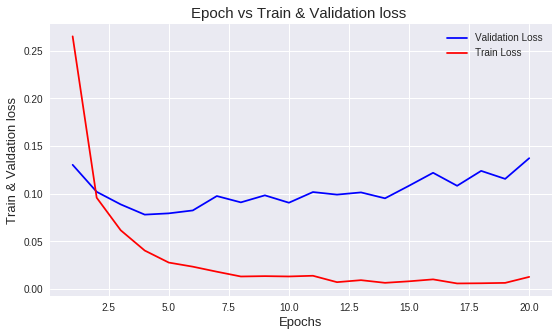


###################################################################



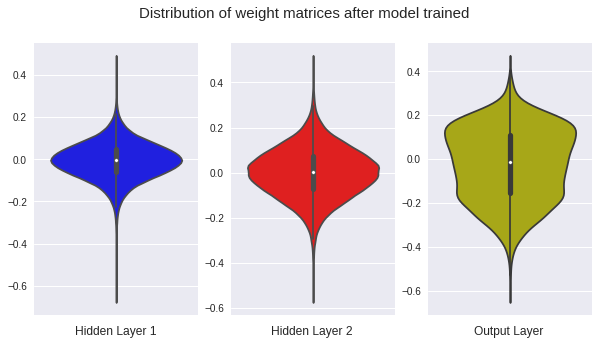


###################################################################



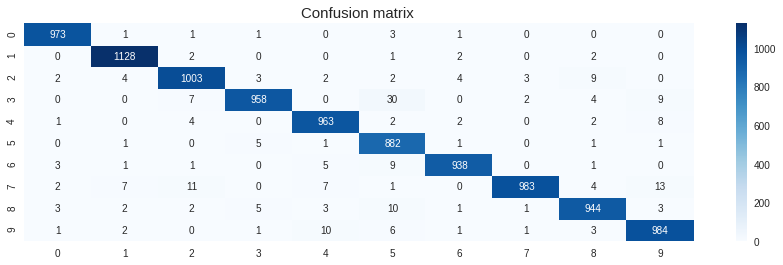

In [0]:
m1=model_performance('adam','relu')

After 6 epochs, the test error seem to be increasing and train error is decreasing which infers that model is overfitting after 6 epochs.

From Confusion matrix, we can see that the most number of wrong prediction is for 3, where the model predicted them as 5.

#### Model & Batch normalization without Dropout:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 400)               314000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 400)               1600      
_________________________________________________________________
dense_5 (Dense)              (None, 200)               80200     
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2010      
Total params: 398,610
Trainable params: 397,410
Non-trainable params: 1,200
_________________________________________________________________

###################################################################


Time taken for training is 0:00:59.953446

Test score: 0.0968

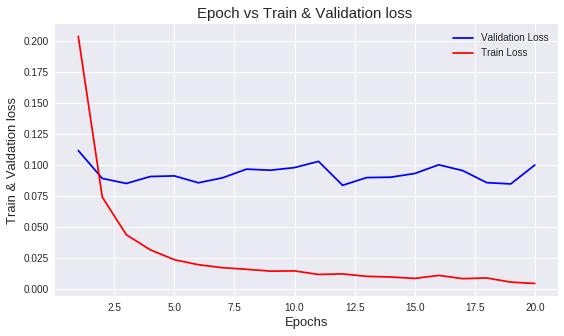


###################################################################



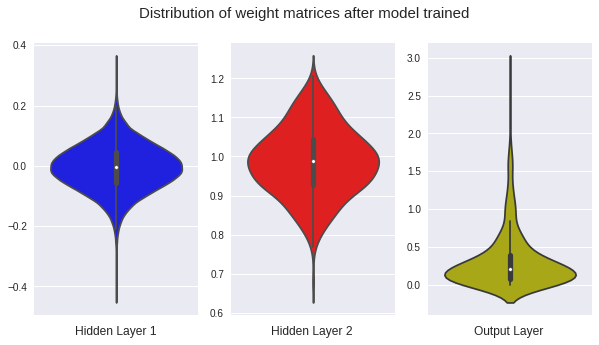


###################################################################



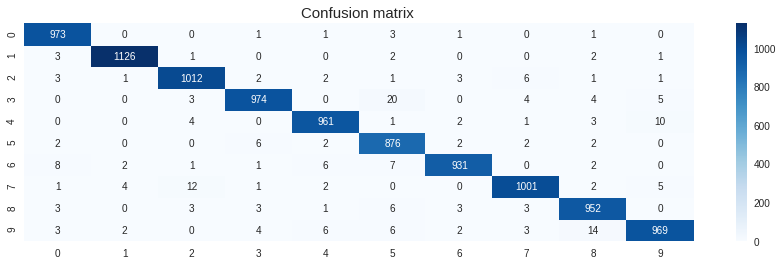

In [0]:
model_performance('adam','relu',1)

<b> Observations : </b>

After adding batch normalization,

* The mean value in weights of hidden layer 2 was changed to '1'  from '0'.

* In output layer, the weights are more towards positive side and very few negative values.

* The model doesn't seem to overfit after 12 epochs whereas without BN,6 epoch the model stated overfitting.

#### Model with Batch normalization & Dropout:

From cross validation tuning, we can infer that the Keep probablity rate of 0.3(1-dropout rate) is the optimal one along with ReLU activation.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 400)               314000    
_________________________________________________________________
batch_normalization_3 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 200)               80200     
_________________________________________________________________
batch_normalization_4 (Batch (None, 200)               800       
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
___________________________

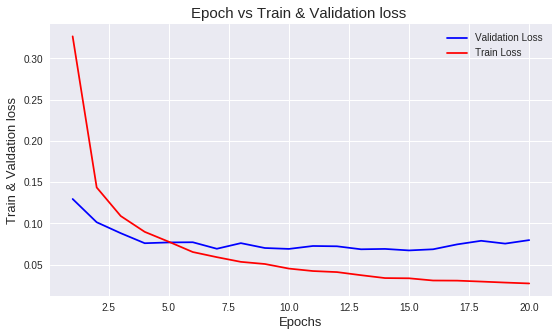


###################################################################



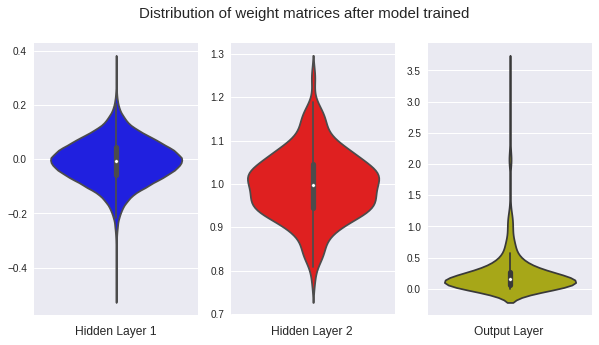


###################################################################



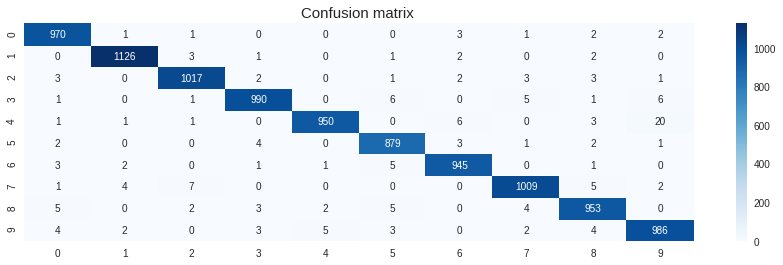

In [0]:
model_performance('adam','relu',1,0.3)

<b>Observations : </b>

* The distribution of weights are almost similar on with and without dropouts.

* After adding dropouts & BN, we can see that performance is improved from 0.9713 to 0.9858.

* The loss cuve of validation set, seem to be smoother than the cases without using dropouts.

## Analysis of MLP with diff parameter settings:

For sake of analysis/learning, I will use <b>sgd</b>  optimizer instead of <b>adam</b> and see, how long it takes for convergence and also how good the performance is.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_11 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________

###################################################################


Time taken for training is 0:00:31.681634

Test score: 0.1682744057968259

Test accuracy: 0.9521


Train score: 0.16334482752867774

Train accuracy: 0.9543529411671209

###################################################################



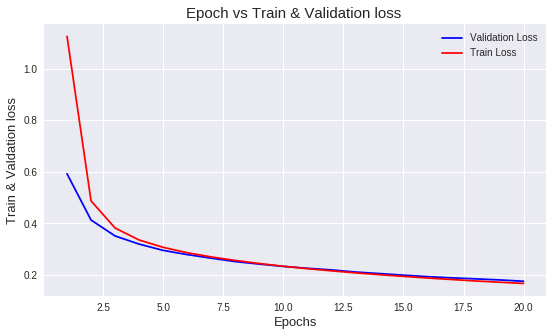


###################################################################



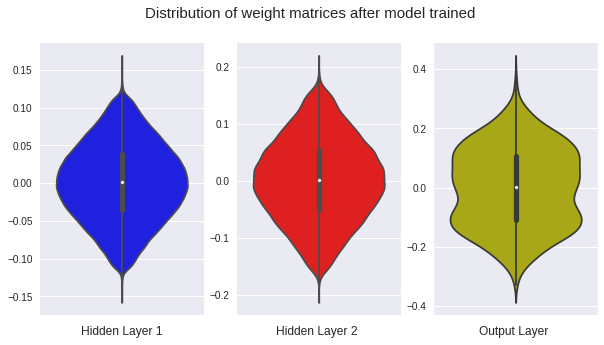


###################################################################



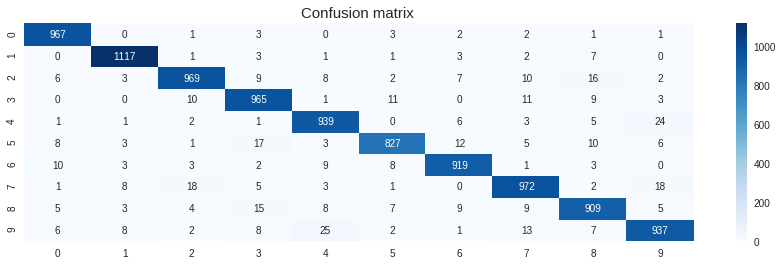

In [0]:
m1=model_performance('sgd','relu')

For this data even SGD is converging too fast, as similar to ADAM but the results are not good as compared to Adam.

We further analyse this by changing the activation unit to <b>sigmoid.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_14 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________

###################################################################


Time taken for training is 0:00:31.672214

Test score: 0.5695427878379822

Test accuracy: 0.8554


Train score: 0.5867205887775795

Train accuracy: 0.8479803921568627

###################################################################



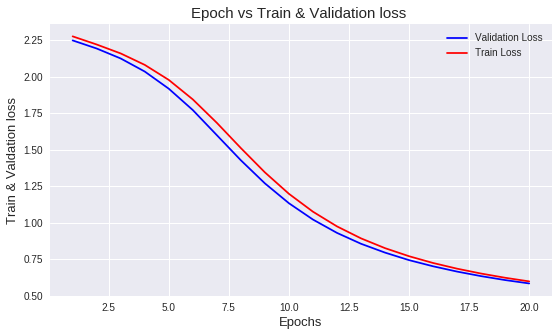


###################################################################



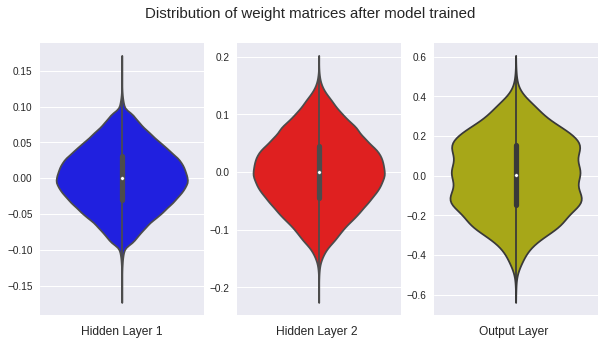


###################################################################



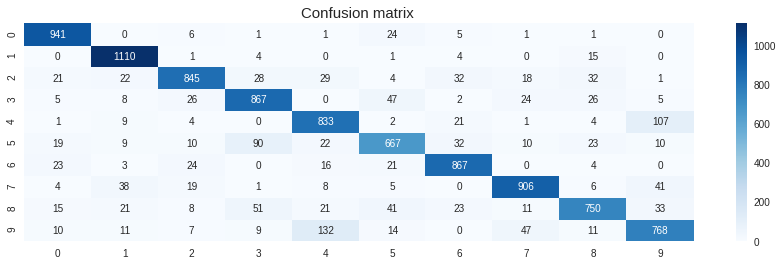

In [0]:
m1=model_performance('sgd','sigmoid')

As with sigmoid, the performance of the model is too poor and even the errors seems to be continously decreasing and no saturation till 20 epochs. Lets increase more to 50 epochs and see how good it is.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_17 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________

###################################################################


Time taken for training is 0:01:18.380382

Test score: 0.34835193592309954

Test accuracy: 0.9004


Train score: 0.36246306167396847

Train accuracy: 0.8980196078337875

###################################################################



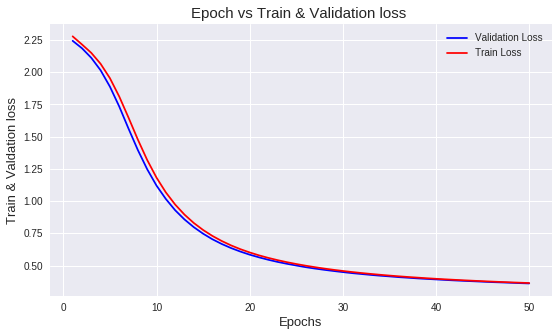


###################################################################



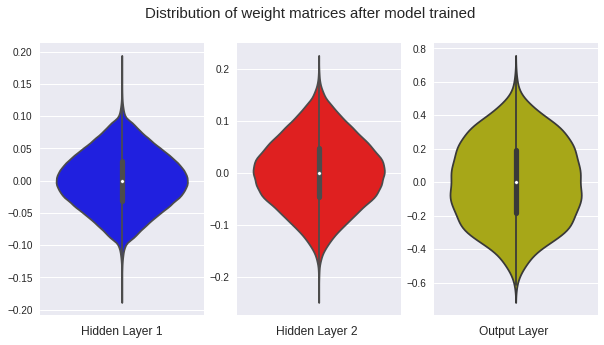


###################################################################



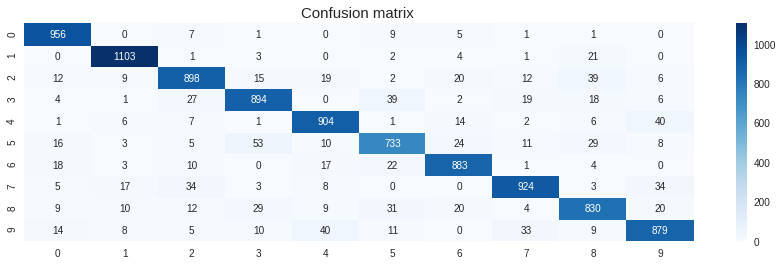

In [0]:
epoch=50
m1=model_performance('sgd','sigmoid')

With <b>50 epochs </b> the test accuracy seem to be good but still, Relu within 20 epochs is far more better than this, which emphasize us that Relu is the best activation for this MNIST dataset.

## <center>  MLP - Arichtecture 2(3 Layers) :

The architecture of this new MLP is,


<b><center>Input layer -> Hidden layer 1(600 Neurons) -> Hidden layer 2(400 Neurons) -> Hidden layer 3(200 Neurons) -> Output layer(Softmax).

In [0]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 150  #Batch size
epoch = 20  # No of epochs
layer1= 600 # No of neurons in layer 1
layer2= 400 # No of neurons in layer 2
layer3= 200 # No of neurons in layer 3

In [0]:
def model_MLP1(opt,activ,BN,drop):
  '''
  To create a MLP model with mentioned parameters optimization ,activation ,Batch Normalization, dropout.
  '''
  mnist_model = Sequential()
  
  #To set initializer for weights according to activation
  # Since default is glorot and Sigmoid works well.For Relu we need to modify with he_normal intialization
  if activ=='relu':
    k=he_normal(seed=33)
  else:
    k=glorot_normal(seed=33)
  
  # Layer 1
  
  mnist_model.add(Dense(layer1, input_dim=input_dim, activation=activ,kernel_initializer=k))
  if BN==1:
    mnist_model.add(BatchNormalization())
  if drop!=0:
    mnist_model.add(Dropout(drop))
    
  # Layer 2
  
  mnist_model.add(Dense(layer2, activation=activ,kernel_initializer=k))
  if BN==1:
    mnist_model.add(BatchNormalization())
  if drop!=0:
    mnist_model.add(Dropout(drop))
    
  #Layer 3
 
  mnist_model.add(Dense(layer3, activation=activ,kernel_initializer=k))
  if BN==1:
    mnist_model.add(BatchNormalization())
  if drop!=0:
    mnist_model.add(Dropout(drop))   
  
  # Output layer
  mnist_model.add(Dense(output_dim, activation='softmax'))
  
  mnist_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
  
  mnist_model.summary()
  return mnist_model
  

In [0]:
def model_performance(Opt,activ,BN=0,drop=0):
  '''
  Training an MLP created by the function 'model'.
  '''
  model=model_MLP1(Opt,activ,BN,drop)
  start=datetime.now()
  model_trained = model.fit(x_tr, y_tr, batch_size=batch_size, epochs=epoch, verbose=0, validation_data=(x_cv,y_cv))
  print('\n###################################################################\n')
  print(f'\nTime taken for training is {datetime.now()-start}')
  score = model.evaluate(X_test, Y_test, verbose=0) 
  print('\n* Test score:', score[0]) 
  print('\n* Test accuracy:', score[1])
  score1 = model.evaluate(x_tr, y_tr, verbose=0) 
  print('\n\n* Train score:', score1[0]) 
  print('\n* Train accuracy:', score1[1])
  print('\n###################################################################\n')
  
  
  x = list(range(1,epoch+1)) 
  validation_loss=model_trained.history['val_loss']
  train_loss=model_trained.history['loss']

  plotter(x, validation_loss, train_loss)
  
  print('\n###################################################################\n')
  weight_analyzer(model)
  
  
  print('\n###################################################################\n')
  pred=model.predict_classes(X_test)
  Confusion_matrix(Y_test,pred)
  
  


#### Hyperparameter tuning:

In [0]:
cv=CV(model_MLP1)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 11.5min finished


In [0]:
df=pd.DataFrame(cv.cv_results_)
df

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_activ,param_drop,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,53.665376,0.859547,0.975983,0.994433,sigmoid,0.3,"{'activ': 'sigmoid', 'drop': 0.3}",2,0.976633,0.994233,0.975333,0.994633,0.386256,0.026834,0.000650,0.000200
1,54.496728,0.999905,0.965083,0.976050,sigmoid,0.5,"{'activ': 'sigmoid', 'drop': 0.5}",4,0.966400,0.976033,0.963767,0.976067,0.180651,0.040979,0.001317,0.000017
2,55.240421,1.168533,0.934583,0.940917,sigmoid,0.7,"{'activ': 'sigmoid', 'drop': 0.7}",6,0.934367,0.941033,0.934800,0.940800,0.360966,0.053898,0.000217,0.000117
3,56.142640,1.395783,0.978667,0.996367,relu,0.3,"{'activ': 'relu', 'drop': 0.3}",1,0.979233,0.996267,0.978100,0.996467,0.051417,0.127221,0.000567,0.000100
4,56.167182,1.501563,0.972450,0.983950,relu,0.5,"{'activ': 'relu', 'drop': 0.5}",3,0.972200,0.983500,0.972700,0.984400,0.086020,0.044987,0.000250,0.000450
5,57.145969,1.658456,0.945233,0.951400,relu,0.7,"{'activ': 'relu', 'drop': 0.7}",5,0.943300,0.949133,0.947167,0.953667,0.159790,0.044904,0.001933,0.002267


In [0]:
best_hyperparameter(cv,df)

###################################################################

Best Hyperparameter settings:

 Score 0.978667 using {'activ': 'relu', 'drop': 0.3}

###################################################################

The score for different parameter settings are :

 0.975983 (0.000650) with: {'activ': 'sigmoid', 'drop': 0.3}
 0.965083 (0.001317) with: {'activ': 'sigmoid', 'drop': 0.5}
 0.934583 (0.000217) with: {'activ': 'sigmoid', 'drop': 0.7}
 0.978667 (0.000567) with: {'activ': 'relu', 'drop': 0.3}
 0.972450 (0.000250) with: {'activ': 'relu', 'drop': 0.5}
 0.945233 (0.001933) with: {'activ': 'relu', 'drop': 0.7}

###################################################################



Best hyperparameter setting,<b> Relu as activation and keep_rate as 0.3.

#### Model without Batch normalization & Dropout:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_20 (Dense)             (None, 400)               240400    
_________________________________________________________________
dense_21 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2010      
Total params: 793,610
Trainable params: 793,610
Non-trainable params: 0
_________________________________________________________________

###################################################################


Time taken for training is 0:00:47.929983

* Test score: 0.08302286383031074

* Test accuracy: 0.9827


* Train score: 0.0017473743749614114

* Train accuracy: 0.9995490196078431

#################

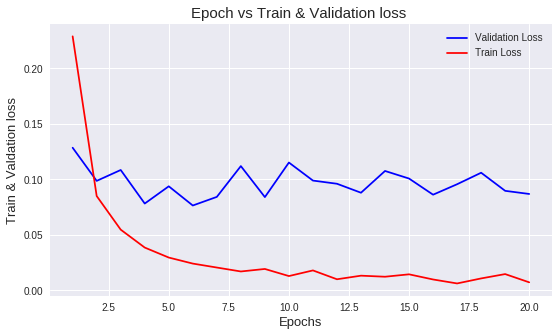


###################################################################



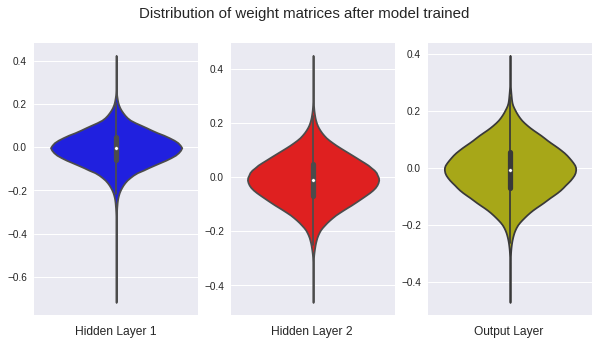


###################################################################



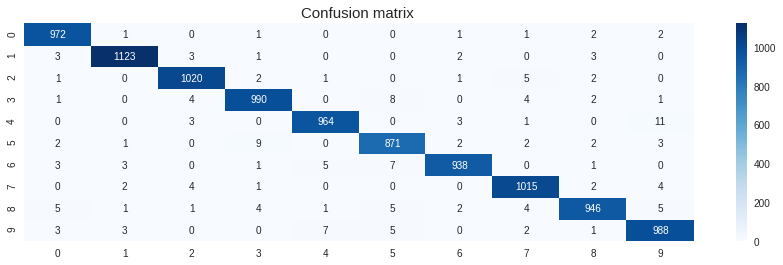

In [0]:
model_performance('adam','relu')

The model seems to be overfitting after 5 epochs as test error is more and train error is lesser.

#### Model with Batch normalization and without Dropout:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_5 (Batch (None, 600)               2400      
_________________________________________________________________
dense_24 (Dense)             (None, 400)               240400    
_________________________________________________________________
batch_normalization_6 (Batch (None, 400)               1600      
_________________________________________________________________
dense_25 (Dense)             (None, 200)               80200     
_________________________________________________________________
batch_normalization_7 (Batch (None, 200)               800       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                2010      
Total para

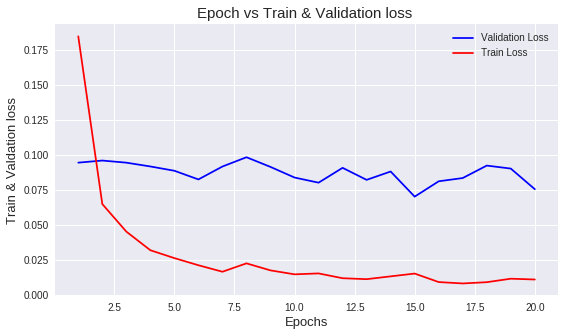


###################################################################



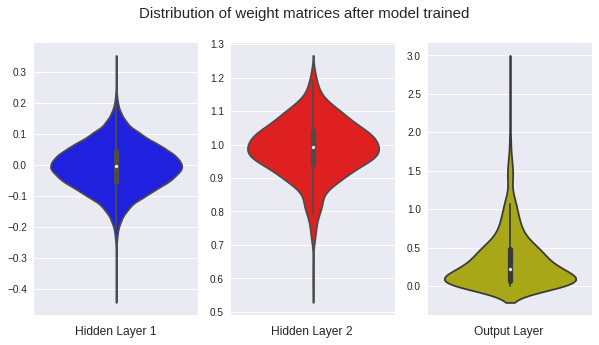


###################################################################



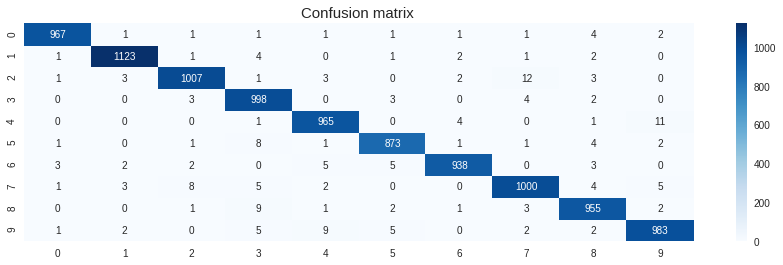

In [0]:
model_performance('adam','relu',1)

Similar observations as that of previous architecture has happened here. We have more positive values in weights of output layer & mean of weights in hidden layer 2 changed to 1 from 0. 

#### Model with Batch normalization & Dropout:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_8 (Batch (None, 600)               2400      
_________________________________________________________________
dropout_3 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 400)               240400    
_________________________________________________________________
batch_normalization_9 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_4 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 200)               80200     
__________

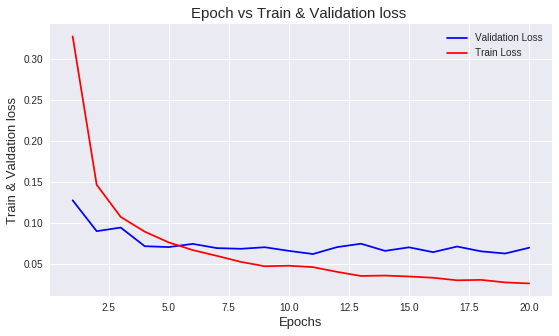


###################################################################



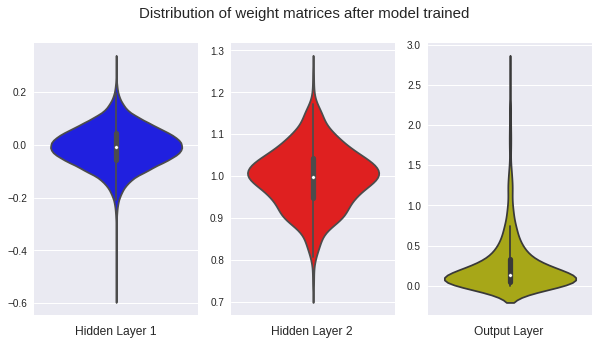


###################################################################



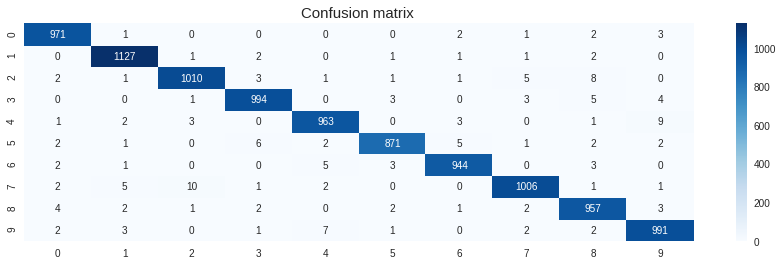

In [0]:
model_performance('adam','relu',1,0.3)

## <center>  MLP - Arichtecture 3(5 Layers) :

The architecture of this new MLP is,

<b><center>Input layer -> Hidden layer 1(500 Neurons) -> Hidden layer 2(400 Neurons) -> Hidden layer 3(300 Neurons) -> Hidden layer 4(200) -> Hidden layer 5(100) -> Output layer(Softmax).

In [0]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 150  #Batch size
epoch = 20  # No of epochs
layer1= 500 # No of neurons in layer 1
layer2= 400 # No of neurons in layer 2
layer3= 300 # No of neurons in layer 3
layer4= 200 # No of neurons in layer 4
layer5= 100 # No of neurons in layer 5

In [0]:
def model_MLP2(opt,activ,BN,drop):
  '''
  To create a MLP model with mentioned parameters optimization ,activation ,Batch Normalization, dropout.
  '''
  mnist_model = Sequential()
  
  #To set initializer for weights according to activation
  # Since default is glorot and Sigmoid works well.For Relu we need to modify with he_normal intialization
  if activ=='relu':
    k=he_normal(seed=33)
  else:
    k=glorot_normal(seed=33)
  
  # Layer 1
  
  mnist_model.add(Dense(layer1, input_dim=input_dim, activation=activ,kernel_initializer=k))
  if BN==1:
    mnist_model.add(BatchNormalization())
  if drop!=0:
    mnist_model.add(Dropout(drop))
    
  # Layer 2
  
  mnist_model.add(Dense(layer2, activation=activ,kernel_initializer=k))
  if BN==1:
    mnist_model.add(BatchNormalization())
  if drop!=0:
    mnist_model.add(Dropout(drop))
    
  #Layer 3
  
  mnist_model.add(Dense(layer3, activation=activ,kernel_initializer=k))
  if BN==1:
    mnist_model.add(BatchNormalization())
  if drop!=0:
    mnist_model.add(Dropout(drop))
    
    
  #Layer 4
  
  mnist_model.add(Dense(layer4, activation=activ,kernel_initializer=k))
  if BN==1:
    mnist_model.add(BatchNormalization())
  if drop!=0:
    mnist_model.add(Dropout(drop))
    
  #Layer 5
  
  mnist_model.add(Dense(layer5, activation=activ,kernel_initializer=k))
  if BN==1:
    mnist_model.add(BatchNormalization())
  if drop!=0:
    mnist_model.add(Dropout(drop))   
  
  # Output layer
  mnist_model.add(Dense(output_dim, activation='softmax'))
  
  mnist_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
  
  mnist_model.summary()
  return mnist_model
  

In [0]:
def model_performance(Opt,activ,BN=0,drop=0):
  '''
  Training an MLP created by the function 'model'.
  '''
  model=model_MLP2(Opt,activ,BN,drop)
  start=datetime.now()
  model_trained = model.fit(x_tr, y_tr, batch_size=batch_size, epochs=epoch, verbose=0, validation_data=(x_cv,y_cv))
  print('\n###################################################################\n')
  print(f'\nTime taken for training is {datetime.now()-start}')
  score = model.evaluate(X_test, Y_test, verbose=0) 
  print('\n* Test score:', score[0]) 
  print('\n* Test accuracy:', score[1])
  score1 = model.evaluate(x_tr, y_tr, verbose=0) 
  print('\n\n* Train score:', score1[0]) 
  print('\n* Train accuracy:', score1[1])
  print('\n###################################################################\n')
  
  
  x = list(range(1,epoch+1)) 
  validation_loss=model_trained.history['val_loss']
  train_loss=model_trained.history['loss']

  plotter(x, validation_loss, train_loss)
  
  print('\n###################################################################\n')
  weight_analyzer(model)
  
  print('\n###################################################################\n')
  pred=model.predict_classes(X_test)
  Confusion_matrix(Y_test,pred)
    
  
  
 

#### Hyperparameter tuning:

In [0]:
cv=CV(model_MLP2)
df=pd.DataFrame(cv.cv_results_)
df

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 17.8min finished


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_activ,param_drop,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,81.728410,2.517207,0.972933,0.987550,sigmoid,0.3,"{'activ': 'sigmoid', 'drop': 0.3}",2,0.973433,0.987200,0.972433,0.987900,0.476364,0.069462,0.000500,0.000350
1,82.844402,2.850215,0.957700,0.965617,sigmoid,0.5,"{'activ': 'sigmoid', 'drop': 0.5}",4,0.957867,0.965700,0.957533,0.965533,0.381645,0.052131,0.000167,0.000083
2,83.704387,3.187853,0.915383,0.919600,sigmoid,0.7,"{'activ': 'sigmoid', 'drop': 0.7}",6,0.915967,0.919933,0.914800,0.919267,0.435710,0.091545,0.000583,0.000333
3,85.284907,3.542998,0.977067,0.993300,relu,0.3,"{'activ': 'relu', 'drop': 0.3}",1,0.977800,0.993233,0.976333,0.993367,0.839876,0.038360,0.000733,0.000067
4,86.159504,3.893601,0.967533,0.976683,relu,0.5,"{'activ': 'relu', 'drop': 0.5}",3,0.967367,0.975800,0.967700,0.977567,0.390932,0.074070,0.000167,0.000883
5,88.201767,4.289519,0.924633,0.929983,relu,0.7,"{'activ': 'relu', 'drop': 0.7}",5,0.922000,0.928600,0.927267,0.931367,0.101282,0.074131,0.002633,0.001383


In [0]:
best_hyperparameter(cv,df)

###################################################################

Best Hyperparameter settings:

 Score 0.977067 using {'activ': 'relu', 'drop': 0.3}

###################################################################

The score for different parameter settings are :

 0.972933 (0.000500) with: {'activ': 'sigmoid', 'drop': 0.3}
 0.957700 (0.000167) with: {'activ': 'sigmoid', 'drop': 0.5}
 0.915383 (0.000583) with: {'activ': 'sigmoid', 'drop': 0.7}
 0.977067 (0.000733) with: {'activ': 'relu', 'drop': 0.3}
 0.967533 (0.000167) with: {'activ': 'relu', 'drop': 0.5}
 0.924633 (0.002633) with: {'activ': 'relu', 'drop': 0.7}

###################################################################



Best pair of Hyper paramter settings are, <b> Activation unit : Relu and Dropout = 0.3

#### Model without Batch normalization & Dropout:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_32 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_33 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_34 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_35 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1010      
Total params: 794,510
Trainable params: 794,510
Non-trainable params: 0
_________________________________________________________________

###

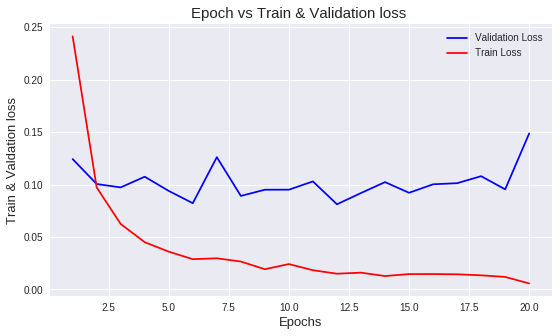


###################################################################



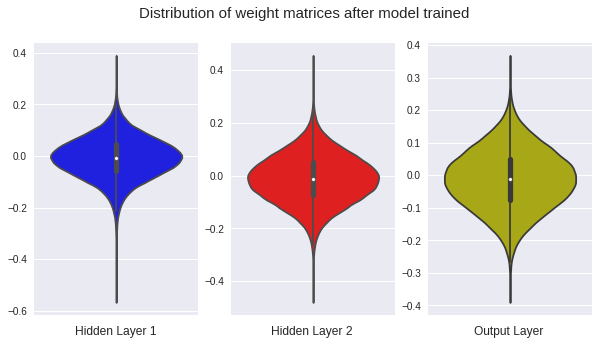


###################################################################



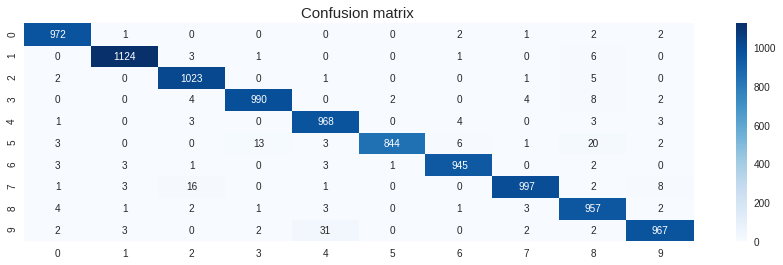

In [0]:
model_performance('adam','relu')

After 10 epochs, the model started overfitting.

The weight vectors are symmetrically distributed.

#### Model without Batch normalization & Dropout:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_11 (Batc (None, 500)               2000      
_________________________________________________________________
dense_38 (Dense)             (None, 400)               200400    
_________________________________________________________________
batch_normalization_12 (Batc (None, 400)               1600      
_________________________________________________________________
dense_39 (Dense)             (None, 300)               120300    
_________________________________________________________________
batch_normalization_13 (Batc (None, 300)               1200      
_________________________________________________________________
dense_40 (Dense)             (None, 200)               60200     
__________

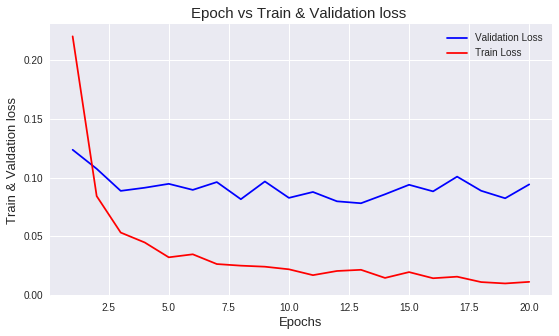


###################################################################



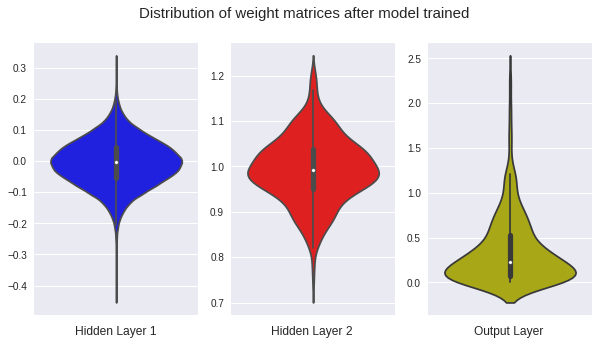


###################################################################



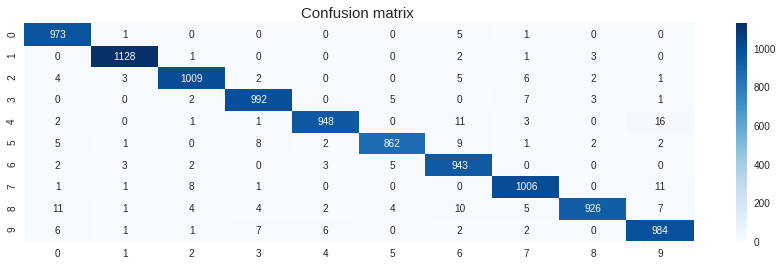

In [0]:
model_performance('adam','relu',1)

There is very slight increase in accuracy with addition of Batch normalization layers.

#### Model without Batch normalization & Dropout:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_16 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 400)               200400    
_________________________________________________________________
batch_normalization_17 (Batc (None, 400)               1600      
_________________________________________________________________
dropout_7 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 300)               120300    
__________

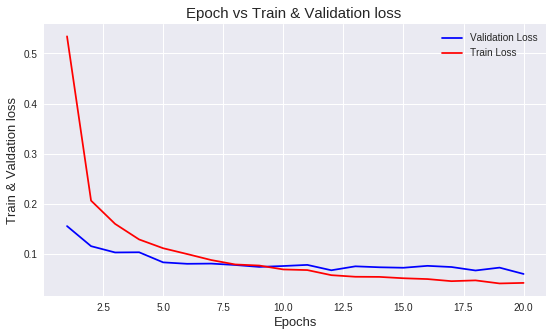


###################################################################



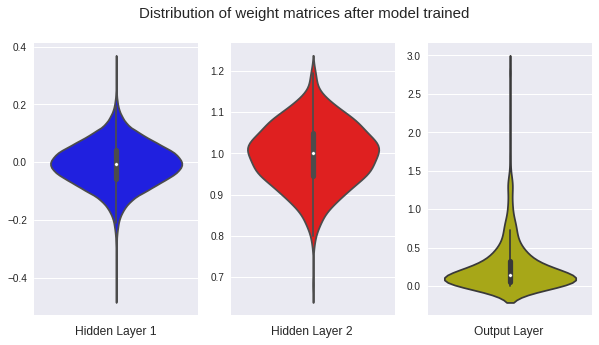


###################################################################



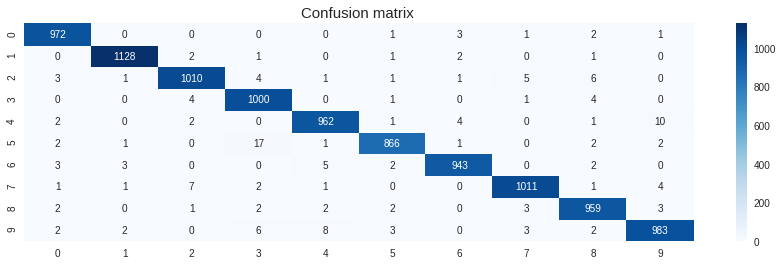

In [0]:
model_performance('adam','relu',1,0.3)

There is a increase in accuracy of close to 1% after adding dropouts and also from the plot we can infer that the model started to overfit after 10 epochs.

## <center> Performance comparision 

Let us compare all the different architectures,optimization methods & activation function used, to confirm the one that seems to be best.

In [0]:
print('\n Model type \n 1.) Simple Model  \n 2.) Model with Batch Normalization \n 3.) Model with Batch normalization and dropouts \n')
tmp=pd.DataFrame(columns=['# Hidden Layers','Model type','Activation','Optimization','Train accuracy','Test accuracy','No of epochs','Time to train'])

#2Layers 
#SGD
tmp.loc[0]=[2,'1','Relu','SGD',0.9543,0.9521,'20','0:31']
tmp.loc[1]=[2,'1','Sigmoid','SGD',0.8990,0.9004,'50','1:18']

tmp.head(2)

#ADAM
tmp.loc[2]=[2,'1','Relu','Adam',0.9952,0.9756,'20','0:38']
tmp.loc[3]=[2,'2','Relu','Adam',0.9961,0.9775,'20','0:59']
tmp.loc[4]=[2,'3','Relu','Adam',0.9969,0.9825,'20','1:02']

#3 Layers - (ADAM)
tmp.loc[5]=[3,'1','Relu','Adam',0.9995,0.9827,'20','0:47']
tmp.loc[6]=[3,'2','Relu','Adam',0.9986,0.9809,'20','1:25']
tmp.loc[7]=[3,'3','Relu','Adam',0.9980,0.9834,'20','1:29']

#5 Layers - (ADAM)
tmp.loc[8]=[2,'1','Relu','Adam',0.9947,0.9787,'20','0:58']
tmp.loc[9]=[2,'2','Relu','Adam',0.9949,0.9771,'20','2:00']
tmp.loc[10]=[2,'3','Relu','Adam',0.9973,0.9834,'20','2:06']

tmp



 Model type 
 1.) Simple Model  
 2.) Model with Batch Normalization 
 3.) Model with Batch normalization and dropouts 



,# Hidden Layers,Model type,Activation,Optimization,Train accuracy,Test accuracy,No of epochs,Time to train
0,2,1,Relu,SGD,0.9543,0.9521,20,0:31
1,2,1,Sigmoid,SGD,0.8990,0.9004,50,1:18
2,2,1,Relu,Adam,0.9952,0.9756,20,0:38
3,2,2,Relu,Adam,0.9961,0.9775,20,0:59
4,2,3,Relu,Adam,0.9969,0.9825,20,1:02
5,3,1,Relu,Adam,0.9995,0.9827,20,0:47
6,3,2,Relu,Adam,0.9986,0.9809,20,1:25
7,3,3,Relu,Adam,0.9980,0.9834,20,1:29
8,2,1,Relu,Adam,0.9947,0.9787,20,0:58
9,2,2,Relu,Adam,0.9949,0.9771,20,2:00


From above comparision we can see that, both the architecture 2 & 3 with BN,Dropouts and Relu has overall highest and same test accuracy as 0.9834 .But among the both we conclude that <b> Architecture 2 is best, since it has a simple architecture and obviously it took lower time to train. 

# <center> Conclusion

* The accuracy of the model always seem to increase with dropouts, as it prevents the model from overfitting.

* In many models, from the confusion matrix, we can see that most number of incorrect predictions are for the below pairs, which is valid because they have similar shape.

 * 3 & 5
 * 2 & 7.
 * 4 & 9.
 
* Without dropouts, the loss curve of validation/test set is jagged.

* Sigmoid activation seem to take longer time to converge and also the accuracy is not as good as that of Relu.

* Since the network is not that deep and also we used efficient weight initialization strategies, we can see from weight vectors plot, that there are no exploding/Vanishing gradient problems encountered.

* We just performed hyperparameter tuning for activation and dropouts, in case of we did tuning for more parameters like number of hidden layers, no of neurons in each layer etc, we can get an even better model.